##Import modules, open and clean dataset

Dataset user: churn_challenge_data.csv

###Data handling Procedures 
- remove data with low occurrence
- Enconding categorical binary data

####Obs:
Some categorical data have labels that are not explained in the legend.
For this reason, in this example we are only going to use binary and geographic categorical data.


In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys
from sklearn import preprocessing

#Only use to check a array without truncation
#np.set_printoptions(threshold=sys.maxsize)

binary_data = ['asl_flag','creditcd','kid0_2','kid11_15','kid3_5','kid6_10','new_cell','refurb_new']
#Dataset
data_df = pd.read_csv('./churn_challenge_data.csv')
rows = data_df.shape[0]
chun = data_df['churn']
keys = data_df.columns

# check for data occurrence
percentage_dict = {}
for column in keys:
	data = data_df[column]
	empty_data = data.isnull().sum()
	percentage = (rows - empty_data)/rows
	percentage_dict[column] = percentage

# clean data with low occurrence
low_keys = []
for j in list(percentage_dict.keys()): 
	if percentage_dict[j] < 0.9:
		low_keys.append(j)
		del percentage_dict[j]
data_df.drop(columns=low_keys)

#Enconding binary data
for binary_key in binary_data:
	data_df[binary_key].replace(to_replace='Y',value=1,inplace=True)
	data_df[binary_key].replace(to_replace='R',value=1,inplace=True) # Refurb_new = Refurbed equipament
	data_df[binary_key].replace(to_replace='N',value=0,inplace=True) # Refurb_new = New equipament
	data_df[binary_key].replace(to_replace='U',value=0,inplace=True)
	data_df[binary_key].astype('float')

###Correlation
To check which data are most relevant for the "churn", it was chosen to compare the Pearson and Spearmen criteria.
As can be seen in the output, both will be numerically similar, for this fact, only the pearson criterion will continue to be used.

In [97]:
print('Spearman')
print(data_df.corr(method='spearman')['churn'].sort_values(ascending = False))
print('\nPearson')
cor = data_df.corr(method='pearson')
print(cor['churn'].sort_values(ascending = False))

Spearman
churn            1.000000
eqpdays          0.119325
totcalls         0.048021
adjqty           0.047102
ovrrev_Mean      0.045651
                   ...   
mou_cvce_Mean   -0.052285
lor             -0.054358
totmrc_Mean     -0.062650
change_mou      -0.062743
hnd_price       -0.100872
Name: churn, Length: 86, dtype: float64

Pearson
churn          1.000000
eqpdays        0.107837
ovrrev_Mean    0.039288
vceovr_Mean    0.038727
refurb_new     0.037194
                 ...   
change_mou    -0.046239
asl_flag      -0.050148
lor           -0.053121
totmrc_Mean   -0.060514
hnd_price     -0.100012
Name: churn, Length: 86, dtype: float64


As can be seen in the outputs, in both criteria, the variables have a low correlation with churn.
A normalization is performed to see if this feature can be improved. 
But as seen in the correlation matrix below, there are not significant differences, so for the next tests we will opt for non-normalized data.

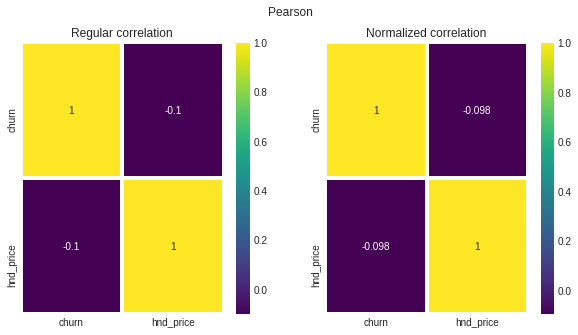

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Pearson')
ax1.set_title('Regular correlation')
#test regular data
regular = data_df[['churn','hnd_price']]
sns.heatmap(regular.corr(),ax = ax1, annot=True,cmap='viridis',linewidth=3)
#test normalized data
x = data_df['hnd_price'].values #returns a numpy array
x = x.reshape(100000, -1)
x=np.nan_to_num(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_df['hnd_price'] = x_scaled
normalized = data_df[['churn','hnd_price']]
ax2.set_title('Normalized correlation')
sns.heatmap(normalized.corr(), ax = ax2, annot=True,cmap='viridis',linewidth=3)
plt.show()

For the purposes of an initial analysis, we will emphasize those that have the greatest direct and inverse correlation.

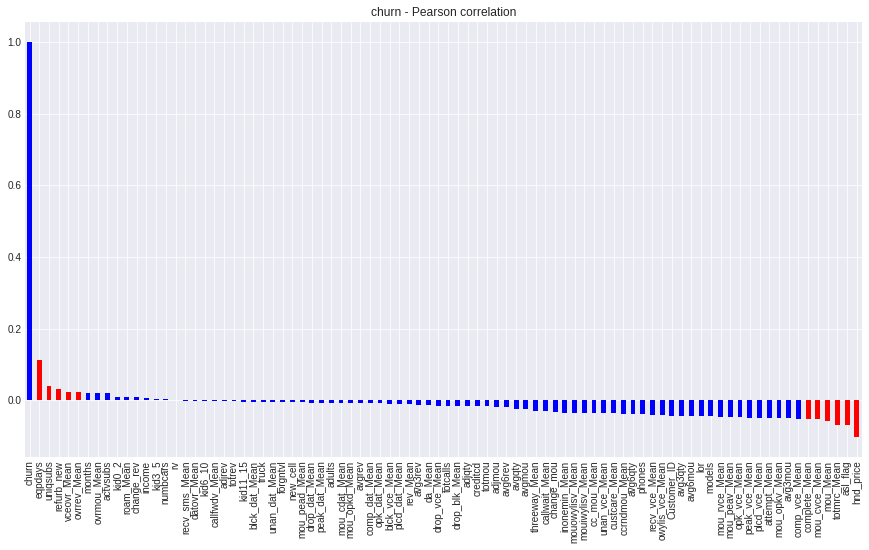

In [ ]:
cor = data_df.corr(method='pearson')
plt.figure(figsize=(15,8))
plt.title('churn - Pearson correlation')
color_list = []
for values in cor['churn'].keys():
  color_list.append('b')
color_list = np.array(color_list)
color_list[1:6] = 'r'
color_list[-6:] = 'r'
cor['churn'].sort_values(ascending = False).plot(kind='bar',color=color_list)
plt.grid()
plt.show()

In [104]:
s = cor.unstack()
so = s.sort_values(ascending=False,kind="quicksort")
print('Positive Correlation')
print(so["churn"].head(12))
print('\nNegative Correlation')
print(so["churn"].tail(12))

Positive Correlation
churn            1.000000
eqpdays          0.107837
ovrrev_Mean      0.039288
vceovr_Mean      0.038727
refurb_new       0.037194
ovrmou_Mean      0.036183
uniqsubs         0.029188
roam_Mean        0.026065
drop_vce_Mean    0.016564
avgqty           0.016503
kid0_2           0.016269
kid3_5           0.015799
dtype: float64

Negative Correlation
avg3mou         -0.028504
cc_mou_Mean     -0.029440
ccrndmou_Mean   -0.031263
mou_opkv_Mean   -0.031711
mou_peav_Mean   -0.033889
mou_Mean        -0.036456
mou_cvce_Mean   -0.044761
change_mou      -0.046239
asl_flag        -0.050148
lor             -0.053121
totmrc_Mean     -0.060514
hnd_price       -0.100012
dtype: float64


###**Re-run cel 1**

##Geographic analysis

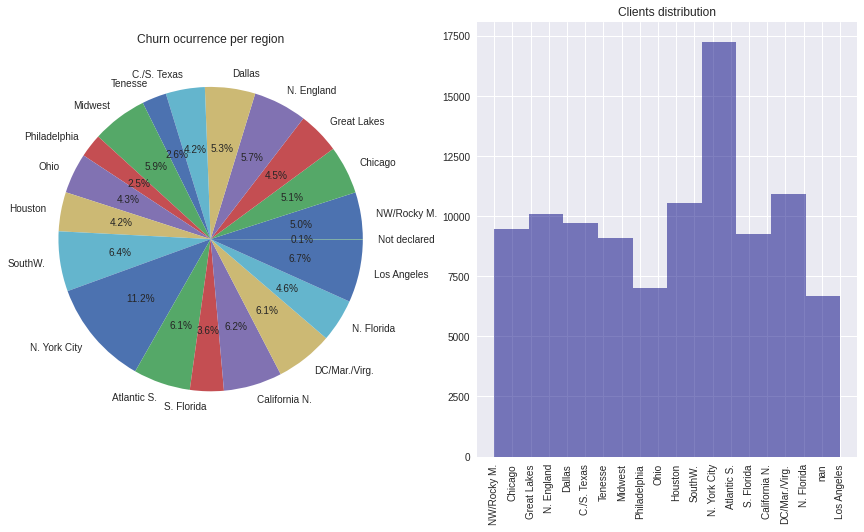

In [107]:
#area Re-label to better visualization
data_df['area'].replace(to_replace='NORTHWEST/ROCKY MOUNTAIN AREA',value='NW/Rocky M.',inplace=True)
data_df['area'].replace(to_replace='CHICAGO AREA',value='Chicago',inplace=True)
data_df['area'].replace(to_replace='GREAT LAKES AREA',value='Great Lakes',inplace=True)
data_df['area'].replace(to_replace='NEW ENGLAND AREA',value='N. England',inplace=True)
data_df['area'].replace(to_replace='DALLAS AREA',value='Dallas',inplace=True)
data_df['area'].replace(to_replace='TENNESSEE AREA',value='Tenesse',inplace=True)
data_df['area'].replace(to_replace='CENTRAL/SOUTH TEXAS AREA',value='C./S. Texas',inplace=True)
data_df['area'].replace(to_replace='MIDWEST AREA',value='Midwest',inplace=True)
data_df['area'].replace(to_replace='PHILADELPHIA AREA',value='Philadelphia',inplace=True)
data_df['area'].replace(to_replace='TENNESSEE AREA',value='Tenessee',inplace=True)
data_df['area'].replace(to_replace='OHIO AREA',value='Ohio',inplace=True)
data_df['area'].replace(to_replace='HOUSTON AREA',value='Houston',inplace=True)
data_df['area'].replace(to_replace='NEW YORK CITY AREA',value='N. York City',inplace=True)
data_df['area'].replace(to_replace='SOUTHWEST AREA',value='SouthW.',inplace=True)
data_df['area'].replace(to_replace='ATLANTIC SOUTH AREA',value='Atlantic S.',inplace=True)
data_df['area'].replace(to_replace='SOUTH FLORIDA AREA',value='S. Florida',inplace=True)
data_df['area'].replace(to_replace='LOS ANGELES AREA',value='Los Angeles',inplace=True)
data_df['area'].replace(to_replace='DC/MARYLAND/VIRGINIA AREA',value='DC/Mar./Virg.',inplace=True)
data_df['area'].replace(to_replace='NORTH FLORIDA AREA',value='N. Florida',inplace=True)
data_df['area'].replace(to_replace='CALIFORNIA NORTH AREA',value='California N.',inplace=True)

# churn per area
area_dict = {}
for area_keys in data_df['area'].unique():
	area_dict[str(area_keys)] = 0
for index, row in data_df.iterrows():
	if row['churn'] == 1:
		user_area = row['area']
		area_dict[str(user_area)] += 1
area_dict['Not declared'] = area_dict.pop('nan')
#Geography visualization
mpl.style.use('seaborn-dark')
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('Churn ocurrence per region')
ax1.pie(area_dict.values(), labels = area_dict.keys(), autopct='%1.1f%%',startangle=0)
ax2.set_title('Clients distribution')
ax2.hist(list(data_df.area),alpha=0.5,color='#000080')
plt.xticks(rotation=90)
plt.grid()
plt.show()

###Client distribution
As can be seen in the histogram on the right, the distribution of customers is almost the same between cities, with a higher concentration at Atlantic South area.

###Churn ocurrence per region
With these data, we can see that the highest evasion rate is in the new york area.

In order to obtain more relevant data, we will try to classify the data only in the regions with the highest occurrence

In [86]:
is_ny =  data_df['area']=='N. York City'
city_data = data_df[is_ny]
cor = city_data.corr(method='pearson')
s = cor.unstack()
so = s.sort_values(ascending=False,kind="quicksort")
print('Positive Correlation')
print(so["churn"].head(12))
print('\nNegative Correlation')
print(so["churn"].tail(12))

Positive Correlation
churn          1.000000
eqpdays        0.139175
uniqsubs       0.052961
actvsubs       0.039953
refurb_new     0.035193
months         0.027478
ovrrev_Mean    0.026760
vceovr_Mean    0.026367
income         0.022579
truck          0.022314
ovrmou_Mean    0.021022
kid11_15       0.019280
dtype: float64

Negative Correlation
opk_vce_Mean      -0.071362
owylis_vce_Mean   -0.072319
attempt_Mean      -0.072544
plcd_vce_Mean     -0.072917
mou_opkv_Mean     -0.073412
complete_Mean     -0.074581
comp_vce_Mean     -0.075095
mou_Mean          -0.075909
mou_cvce_Mean     -0.077118
totmrc_Mean       -0.096090
asl_flag          -0.104358
hnd_price         -0.123023
dtype: float64


The 10 main regions were tested, but for visualization purposes, just above is New York, which is the region with the highest occurrence of .

Even filtering the data by location, our correction rate remains below expectations.

For this reason, we will prioritize the highest correlations, even if their values are below expectations.

###**Re-run cel 1**



##Temporal analysis

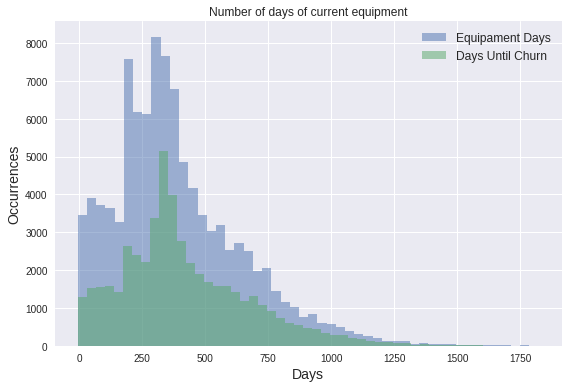

In [3]:

eqpdays_churn_ocurrence= []
for index, row in data_df.iterrows():
	if row['churn'] == 1:
		eqpdays_churn_ocurrence.append(row['eqpdays'])

#eqpdays visualização

mpl.style.use('seaborn')
plt.figsize=(15,8)
plt.title('Number of days of current equipment')
plt.hist(list(data_df.eqpdays),bins=50, alpha=0.5, label='Equipament Days')
plt.hist(eqpdays_churn_ocurrence,bins=50, alpha=0.5, label='Days Until Churn')
plt.ylabel("Occurrences", fontsize=14)
plt.xlabel("Days", fontsize=14)
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()

###Dropout period
it is possible to verify that the evasion rate is accentuated after the 300th day. A marketing can be done during this period to retain customers and avoid churn

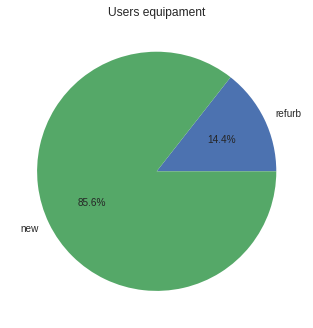

In [5]:
hnd_price_new_eqp_churn_ocurrence= []
hnd_price_ref_eqp_churn_ocurrence= []
hnd_price_churn_ocurrence = []
hnd_price_refurb_cel = []
hnd_price_new_cel = []
for index, row in data_df.iterrows():
  if row['churn'] == 1:
    hnd_price_churn_ocurrence.append(row['hnd_price'])
  if row['refurb_new'] == 1:
    hnd_price_refurb_cel.append(row['hnd_price'])
    if row['churn'] == 1:
      hnd_price_ref_eqp_churn_ocurrence.append(row['hnd_price'])
  else:
    hnd_price_new_cel.append(row['hnd_price'])
    if row['churn'] == 1:
      hnd_price_new_eqp_churn_ocurrence.append(row['hnd_price'])
mpl.style.use('seaborn-dark')
plt.title('Users equipament')
plt.pie([len(hnd_price_refurb_cel),len(hnd_price_new_cel)], labels = ['refurb', 'new'], autopct='%1.1f%%',startangle=0)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Most customers have new handsets (This proportion remains when we look only at customers who have left the service.)

##Service value analysis

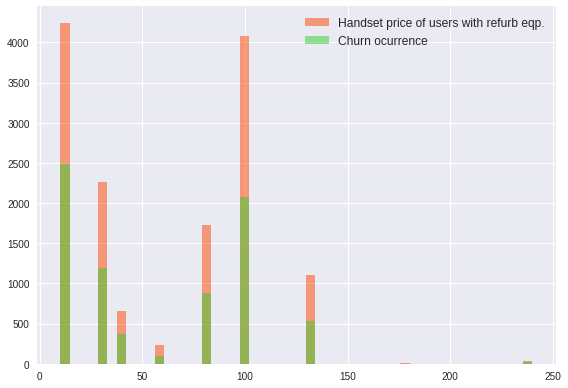

In [6]:
#hnd_price visualização
mpl.style.use('seaborn')
plt.figsize=(15,8)
plt.hist(hnd_price_refurb_cel,bins=50, alpha=0.5, label='Handset price of users with refurb eqp.', color='#ff4500')
plt.hist(hnd_price_ref_eqp_churn_ocurrence,bins=50, alpha=0.5, label='Churn ocurrence', color='#32CD32')
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()

Assuming that customers with refurbished cell phones have a lower income.

we found that there is a greater evasion in services that have values around 10 and 100 dollars. 

It is interesting to re-evaluate the services in these values.

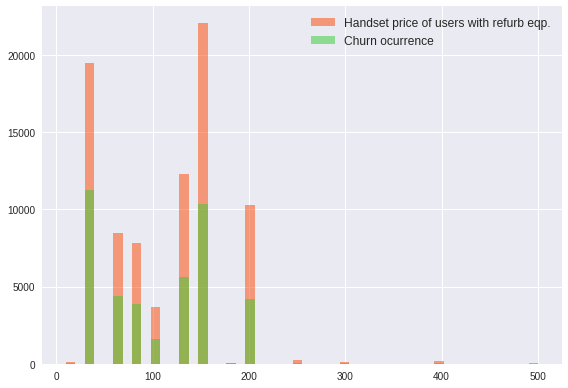

In [7]:
#hnd_price visualização
mpl.style.use('seaborn')
plt.figsize=(15,8)
plt.hist(hnd_price_new_cel,bins=50, alpha=0.5, label='Handset price of users with refurb eqp.', color='#ff4500')
plt.hist(hnd_price_new_eqp_churn_ocurrence,bins=50, alpha=0.5, label='Churn ocurrence', color='#32CD32')
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()

Assuming that customers with new cell phones have a higher income.

we found that there is a greater evasion in services that have values around 30, 130 and 150 dollars.


## Prediction Model
Initial model was built using as parameters the variables that previously presented the highest correlation.
As mentioned above, non-binary categorical variables were not used, as the legend was not clear enough to perform a re-labeling.

For comparison, an SVM and an RandomForestClassifier were used

The data was splited in 70% for training and 30% for test

In [11]:
from sklearn.model_selection import train_test_split
data_df.dropna(inplace=True)
train_df = data_df[['lor', 'hnd_price', 'eqpdays','totmrc_Mean', 'mou_Mean', 'uniqsubs', 'refurb_new', 'comp_vce_Mean', 'vceovr_Mean', 'complete_Mean', 'avg3mou', 'mou_opkv_Mean']]
y=data_df.churn
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=42)

In [102]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_auc_score, classification_report
model_svm= SVC(kernel='linear')
model_svm=SVC(gamma='auto')
output1=model_svm.fit(X_train,y_train)
Prediction1=model_svm.predict(X_test)
print("Support vector machine Accuracy")
print(metrics.accuracy_score(y_test,Prediction1)*100)
print("Classification report")
print(classification_report(y_test,Prediction1))

Support vector machine Accuracy
53.332501248127805
Classification report
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      4269
           1       0.67      0.00      0.00      3743

    accuracy                           0.53      8012
   macro avg       0.60      0.50      0.35      8012
weighted avg       0.60      0.53      0.37      8012



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, classification_report
rf =RandomForestClassifier(n_estimators=13,max_depth=4,random_state=42,criterion='gini')
output1=rf.fit(X_train,y_train)
Predict_out=rf.predict(X_test)
print("Random forest Accuracy")
print(metrics.accuracy_score(y_test,Predict_out)*100)
print("Classification report")
print (classification_report(y_test,Predict_out))

Random forest Accuracy
58.77433849226161
Classification report
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      4269
           1       0.56      0.52      0.54      3743

    accuracy                           0.59      8012
   macro avg       0.58      0.58      0.58      8012
weighted avg       0.59      0.59      0.59      8012



## Profile hypotheses of customers who present greater evasion
Both models did not show optimal accuracy, requiring deeper work or denser models to perform the classification.

The data appear to follow a normal distribution between the analyzed regions.
However customers with different purchasing power have different indicators that lead to evasion. It is interesting to classify them independently from each other.

It can also be seen that there is a period of time (around the 300th day) where the churn rate is high. Considering a contract with an approximate period of 1 year, it would be interesting to see what leads customers not to renew it.